In [1]:
import pandas as pd
import seaborn as sns

In [2]:
stocks = pd.read_csv('../data/stocks_panel.csv', parse_dates=['Date'])
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6285 entries, 0 to 6284
Data columns (total 3 columns):
Date     6285 non-null datetime64[ns]
Stock    6285 non-null object
Price    6285 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 147.4+ KB


In [3]:
stocks.head()

,Date,Stock,Price
0,2014-11-05,AAPL,108.860001
1,2014-11-05,AMZN,296.519989
2,2014-11-05,FB,74.830002
3,2014-11-05,MSFT,47.860001
4,2014-11-05,GOOGL,555.950012


In [4]:
stocks = stocks.set_index(['Stock','Date']).sort_index(level=0)

In [5]:
stocks

Price
Stock Date                  
AAPL  2014-11-05  108.860001
      2014-11-06  108.699997
      2014-11-07  109.010002
      2014-11-10  108.830002
      2014-11-11  109.699997
...                      ...
MSFT  2019-10-28  144.190002
      2019-10-29  142.830002
      2019-10-30  144.610001
      2019-10-31  143.369995
      2019-11-01  143.720001

[6285 rows x 1 columns]

In [6]:
stocks['Price'].mean(level=1)

Date
2014-11-05    216.804001
2014-11-06    216.198003
2014-11-07    216.993998
2014-11-10    219.211993
2014-11-11    221.295997
                 ...    
2019-10-28    729.739987
2019-10-29    719.759998
2019-10-30    723.361987
2019-10-31    723.848013
2019-11-01    731.369989
Name: Price, Length: 1257, dtype: float64

In [7]:
#ARIMA(p,d,q) <-- time based model
#p = how many significant steps/days

In [8]:
stocks2 = pd.read_csv('../data/stocks.csv')

In [9]:
stocks2.head()

,Date,AAPL,GOOGL,FB,MSFT,AMZN
0,2014-11-05,108.860001,555.950012,74.830002,47.860001,296.519989
1,2014-11-06,108.699997,551.690002,75.260002,48.700001,296.640015
2,2014-11-07,109.010002,551.820007,75.599998,48.680000,299.859985
3,2014-11-10,108.830002,558.229980,75.000000,48.889999,305.109985
4,2014-11-11,109.699997,561.289978,74.610001,48.869999,312.010010


In [10]:
#MELTING DATA 
stocks2 = stocks2.melt(id_vars='Date', value_vars=['AAPL', 'GOOGL', 'FB', 'MSFT', 'AMZN'])
#id_vars: index column

In [11]:
stocks2

,Date,variable,value
0,2014-11-05,AAPL,108.860001
1,2014-11-06,AAPL,108.699997
2,2014-11-07,AAPL,109.010002
3,2014-11-10,AAPL,108.830002
4,2014-11-11,AAPL,109.699997
...,...,...,...
6280,2019-10-28,AMZN,1777.079956
6281,2019-10-29,AMZN,1762.709961
6282,2019-10-30,AMZN,1779.989990
6283,2019-10-31,AMZN,1776.660034


In [12]:
#UNMELTING DATA (PIVOT) unwinding/compressing data back
stocks2.pivot(index='Date', columns='variable', values='value')

variable,AAPL,AMZN,FB,GOOGL,MSFT
Date,,,,,
2014-11-05,108.860001,296.519989,74.830002,555.950012,47.860001
2014-11-06,108.699997,296.640015,75.260002,551.690002,48.700001
2014-11-07,109.010002,299.859985,75.599998,551.820007,48.680000
2014-11-10,108.830002,305.109985,75.000000,558.229980,48.889999
2014-11-11,109.699997,312.010010,74.610001,561.289978,48.869999
...,...,...,...,...,...
2019-10-28,249.050003,1777.079956,189.399994,1288.979980,144.190002
2019-10-29,243.289993,1762.709961,189.309998,1260.660034,142.830002
2019-10-30,243.259995,1779.989990,188.250000,1260.699951,144.610001


## Data Visualization With Pandas, Matplotlib & Seaborn

In [13]:
#Matplotlib: The major library that others aare built off of
#Pandas: haas built in matplotlib that allow you to graph based off of a dataframe
#Seaborn: user-friendly version of matplotlib - has a number of custom chart types that are handy

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../data/titanic.csv')

In [15]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

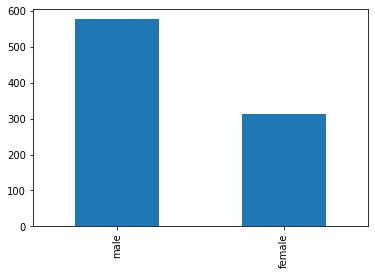

In [16]:
df['Sex'].value_counts().plot(kind='bar');

In [17]:
df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

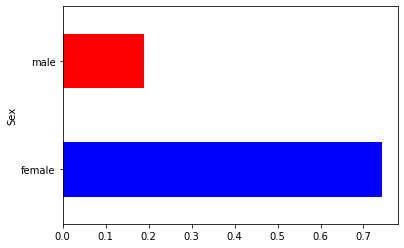

In [18]:
df.groupby('Sex')['Survived'].mean().plot(kind='barh', color=['blue', 'red']);

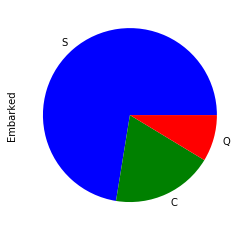

In [19]:
df['Embarked'].value_counts().plot(kind='pie', colors=['blue', 'green', 'red']);

In [20]:
plt.style.use('ggplot')

In [21]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

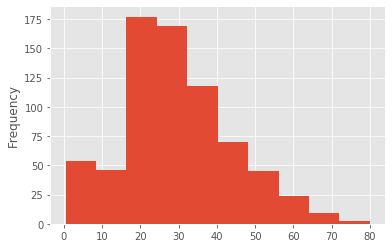

In [22]:
df['Age'].plot(kind='hist'); #frequency of different age groups (values)

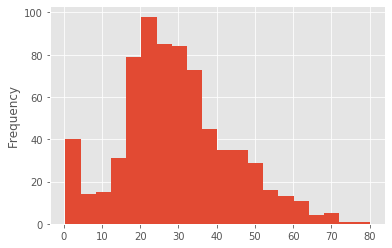

In [23]:
df['Age'].plot(kind='hist', bins=20);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17e686d0>,
      dtype=object)

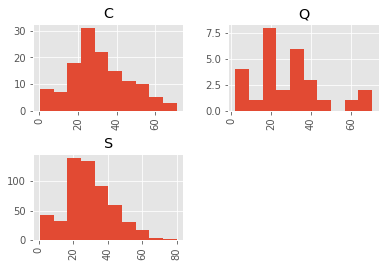

In [24]:
df.hist(column='Age', by='Embarked') #breaking apart by subgroups

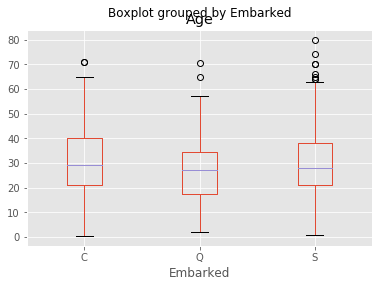

In [25]:
df.boxplot(column='Age', by='Embarked'); #can do the same with box plot

In [26]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a18709dd0>,
      dtype=object)

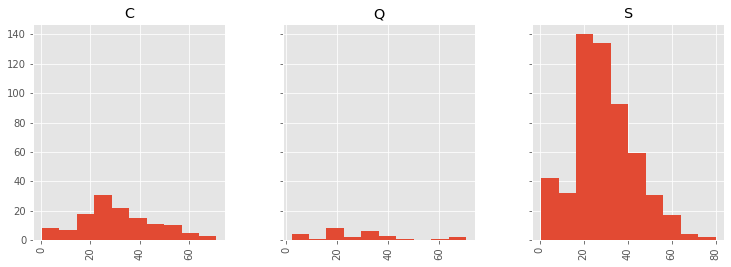

In [27]:
df.hist(column='Age', by='Embarked', layout=(1, 3), figsize=(12, 4), sharey=True)
#sharey / sharex: better display of proportionality 

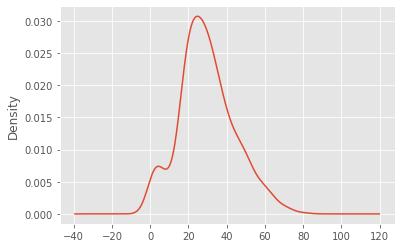

In [28]:
df['Age'].plot(kind='kde'); #frequency valuees, similar to a hist gram except y column is % density

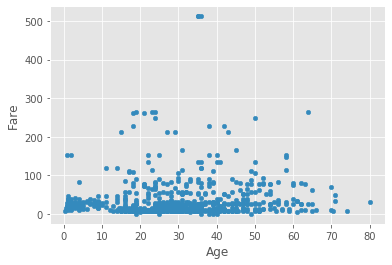

In [29]:
df.plot('Age', 'Fare', kind='scatter');

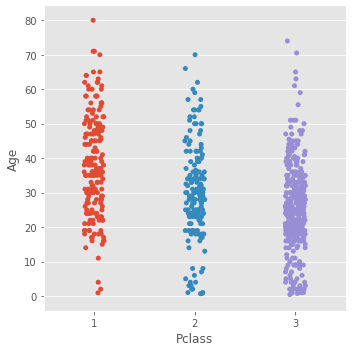

In [34]:
sns.catplot(x='Pclass', y='Age', data=df);


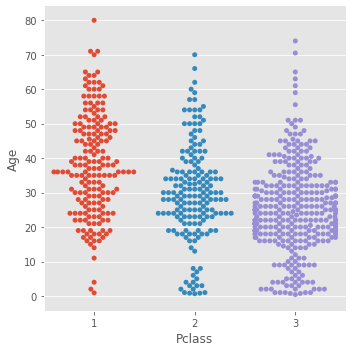

In [33]:
sns.catplot(x='Pclass', y='Age', kind='swarm', data=df);

#like a stylized histogram
#tells us that there are a lot of passengers between 18-35 years old in class 3
#passenger class 1 a lot of people around age 35

In [35]:
#types of plots: swarm, strip, box, boxen, violin, point, bar, count

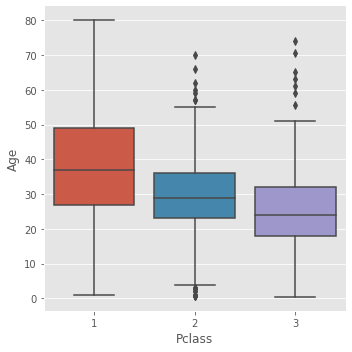

In [40]:
sns.catplot(x='Pclass', y='Age', kind='box', data=df);

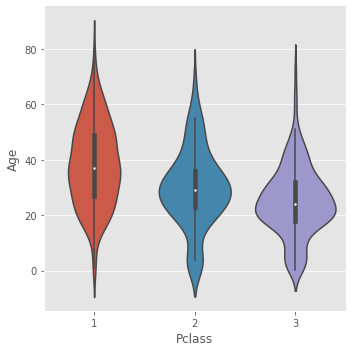

In [52]:
sns.catplot(x='Pclass', y='Age', kind='violin', data=df);

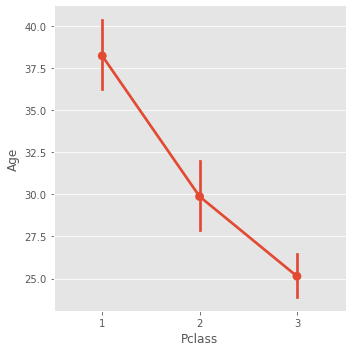

In [42]:
sns.catplot(x='Pclass', y='Age', kind='point', data=df);

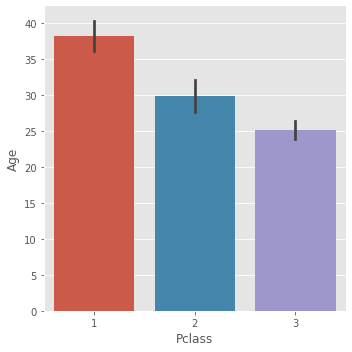

In [43]:
sns.catplot(x='Pclass', y='Age', kind='bar', data=df);

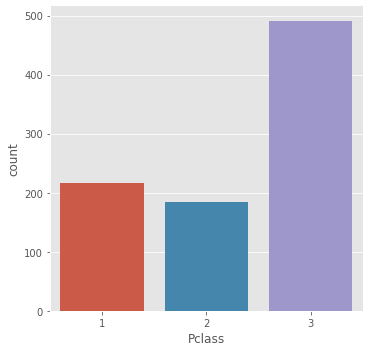

In [48]:
sns.catplot(x='Pclass', y=None, kind='count', data=df);

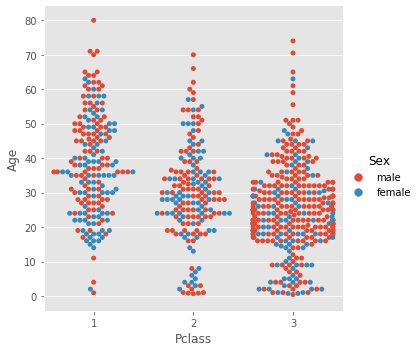

In [60]:
sns.catplot(x='Pclass', y='Age', kind='swarm', hue="Sex", data=df);

#denotes red and blue for sex

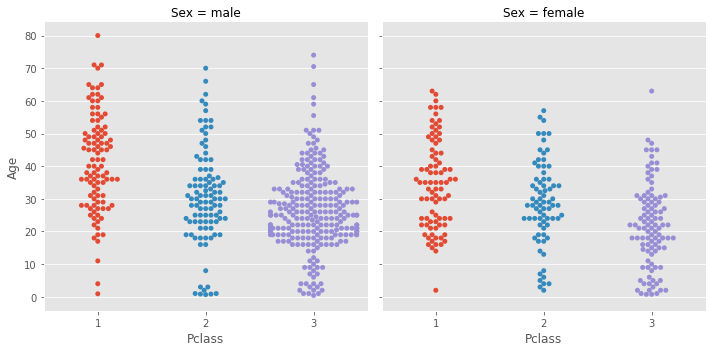

In [63]:
sns.catplot(x='Pclass', y='Age', kind='swarm', col='Sex', data=df);

#col changes into two different columns with each value of sex 


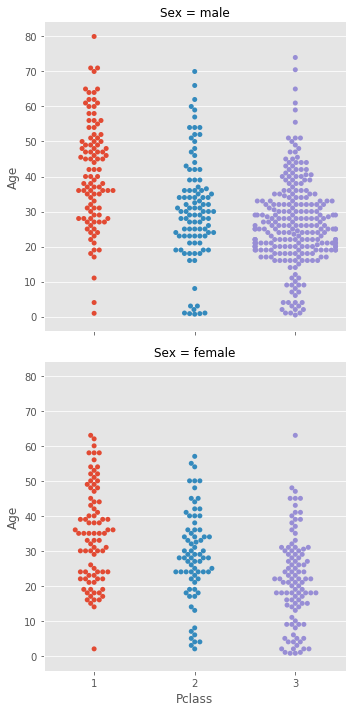

In [64]:
sns.catplot(x='Pclass', y='Age', kind='swarm', row='Sex', data=df);
#row will give each graph its own row 

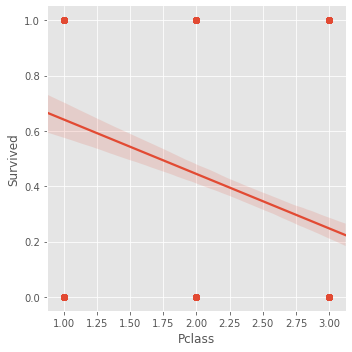

In [66]:
sns.lmplot(x='Pclass', y='Survived', data=df);

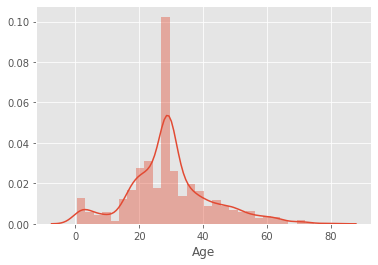

In [71]:
#distplot does not take null values, so we fill them first 
df['Age']=df['Age'].fillna(29)
#and here we plot the distplot, a sexier histogram. 
sns.distplot(df.Age);

#cannot use hue/col/row on distplots

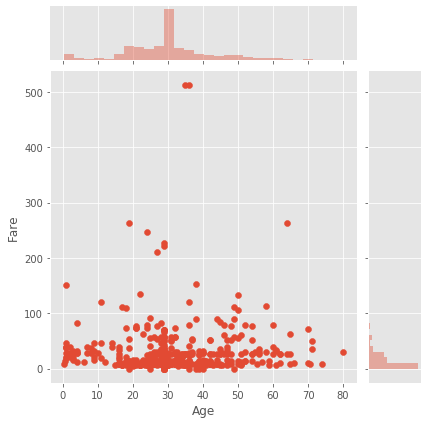

In [73]:
sns.jointplot(x='Age',y='Fare', data=df[df.Sex =='male'])

In [75]:
#image(filename=plot6.jpg) grabs image

NameError: name 'image' is not defined

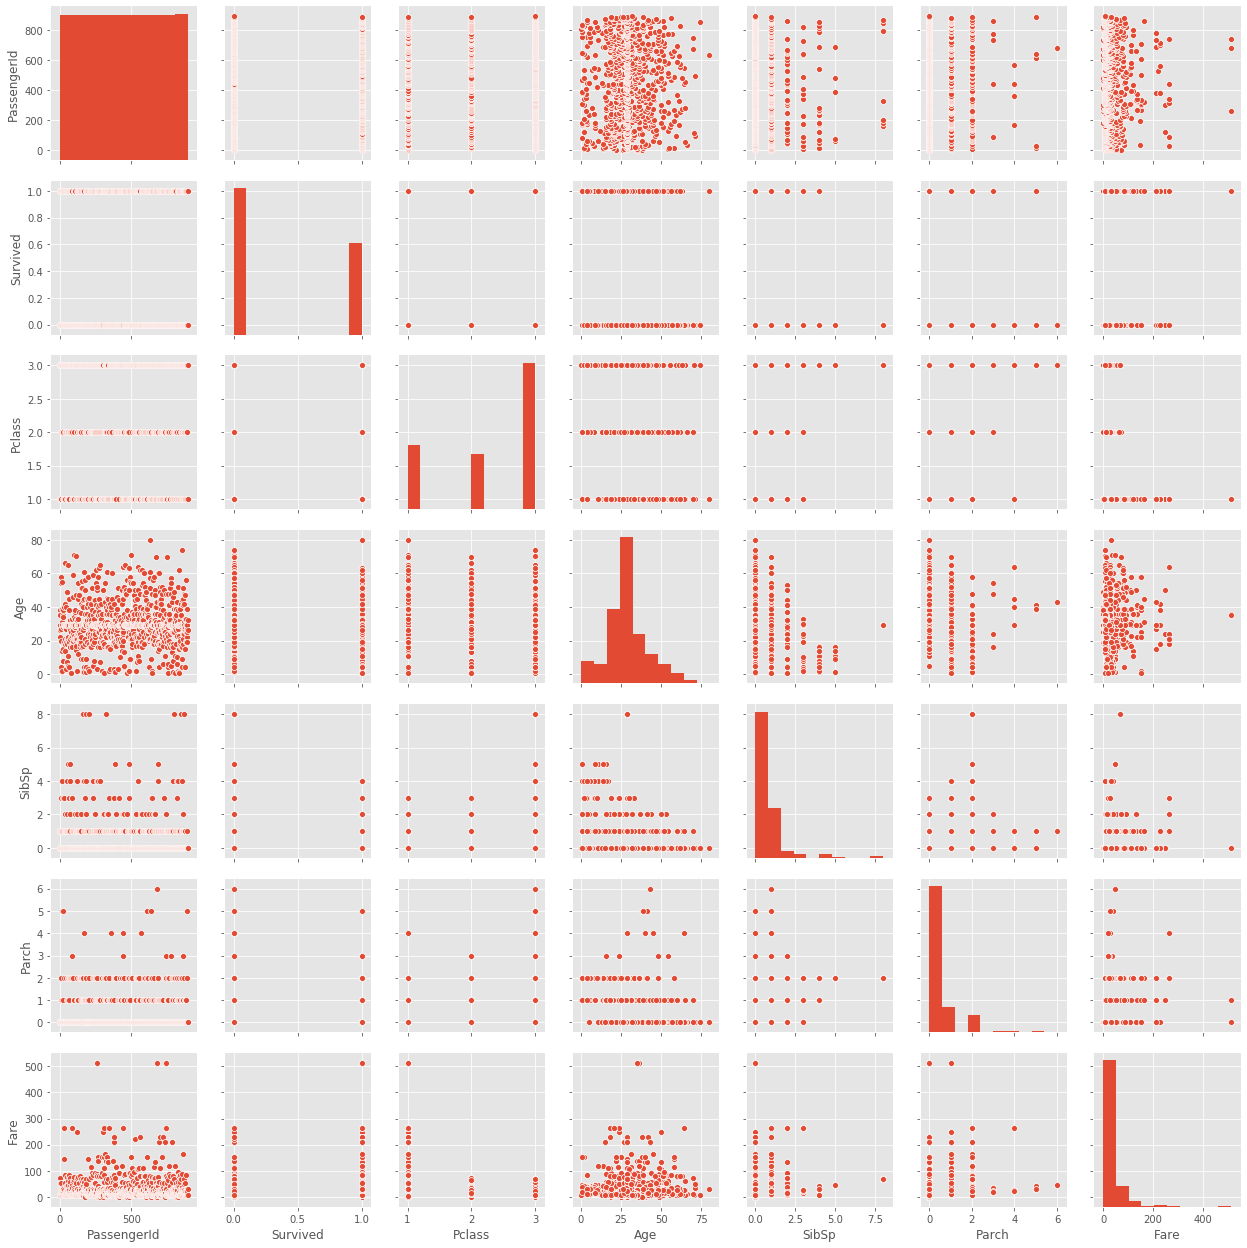

In [76]:
#pairplots
sns.pairplot(df)

In [77]:
#heatmap 

df.corr() #correlation matrix; can see correlation between two variables by looking at the positives. 
#we can then visualize it through a heatmap 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033632,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.067814,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.334974,0.083081,0.018443,-0.549500
Age,0.033632,-0.067814,-0.334974,1.000000,-0.232978,-0.176486,0.093706
SibSp,-0.057527,-0.035322,0.083081,-0.232978,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.176486,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.093706,0.159651,0.216225,1.000000


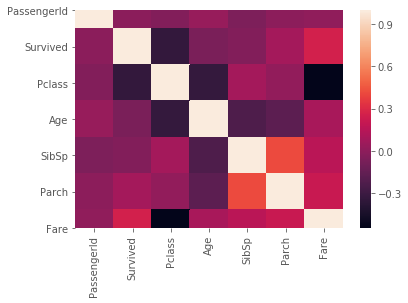

In [84]:
sns.heatmap(df.corr())